In [11]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('spam.csv', encoding='latin1')  # or encoding='ISO-8859-1'
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
990,ham,26th OF JULY,NaN,NaN,NaN
3799,spam,We tried to contact you re your reply to our o...,NaN,NaN,NaN
2213,ham,"Goodmorning, today i am late for 2hrs. Because...",NaN,NaN,NaN
250,ham,Ranjith cal drpd Deeraj and deepak 5min hold,NaN,NaN,NaN
4378,ham,How are you. Just checking up on you,NaN,NaN,NaN


In [18]:
df.shape

(5572, 5)

# Process
1. Data cleaning 
2. EDA
3. Text Preprocessing
4. Model Building 
5. Evaluation
6. Improvements
7. Website
8. Deploy

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Drop last 3 columns

In [21]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [22]:
df.sample(5)

,v1,v2
5173,ham,U 2.
4768,ham,watever reLation u built up in dis world only ...
3359,ham,Please attend the phone:)
2100,ham,Oh Howda gud gud.. Mathe en samachara chikku:-)
171,ham,"Hmmm.. Thk sure got time to hop ard... Ya, can..."


In [25]:
# rename the columns
df.rename(columns={'v1':'target', 'v2' : 'text'}, inplace=True)
df.sample(5)

,target,text
2777,ham,Kind of. Took it to garage. Centre part of exh...
525,ham,Hi i won't b ard 4 christmas. But do enjoy n m...
407,ham,Hello! Good week? Fancy a drink or something l...
4504,spam,Mobile Club: Choose any of the top quality ite...
2518,ham,Joy's father is John. Then John is the NAME of...


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target']= encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
# missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [33]:
# check for duplicates
df.duplicated().sum()
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [34]:
df.shape

(5169, 2)

# EDA

In [35]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

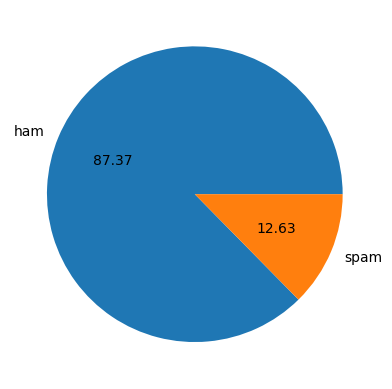

In [38]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [39]:
# Data is imbalanced

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\irbag\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [43]:
# length of each messages, that is no of characters
df['num_characters'] = df['text'].apply(len)

In [44]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [52]:
# num of words 
import nltk
nltk.download('punkt_tab')
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\irbag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [53]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [57]:
# num of sentences in the text
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [58]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [59]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
# ham message describe
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [62]:
# spam messages describe
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_words', ylabel='Count'>

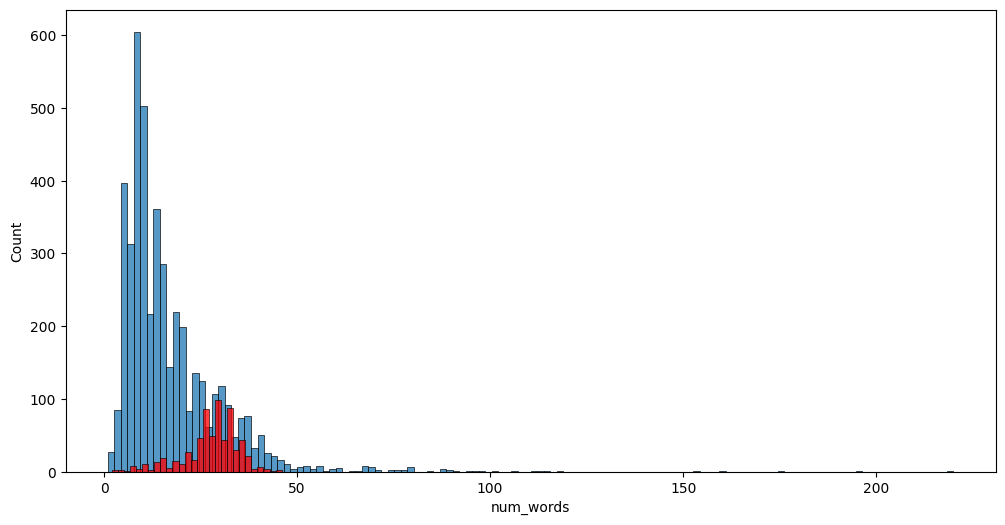

In [66]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

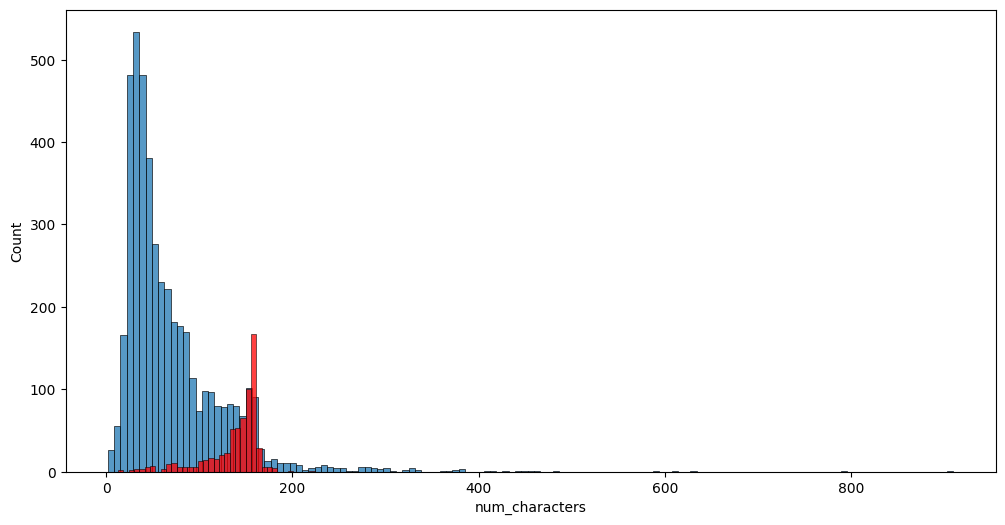

In [68]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

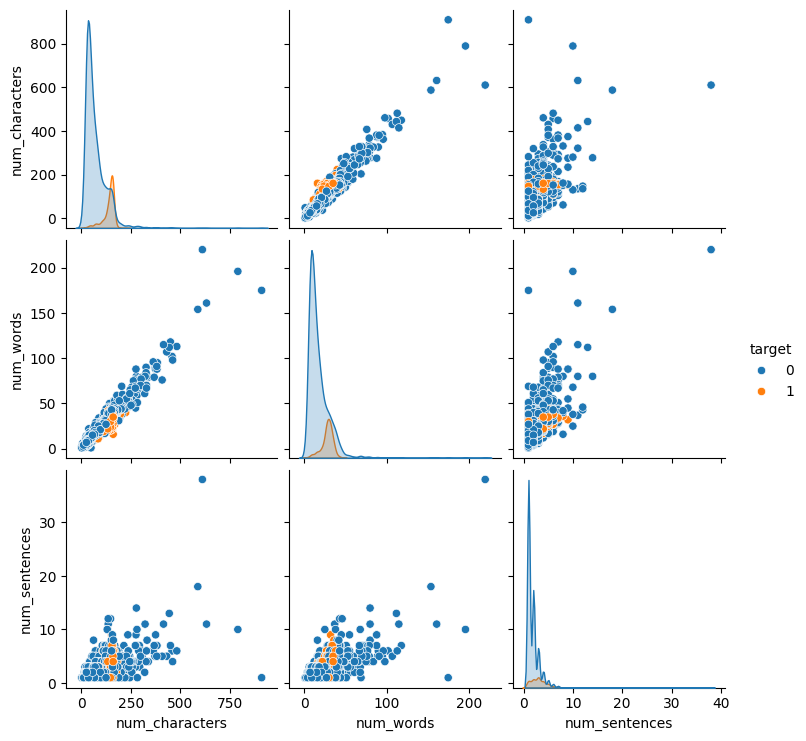

In [69]:
sns.pairplot(df, hue='target')

<Axes: >

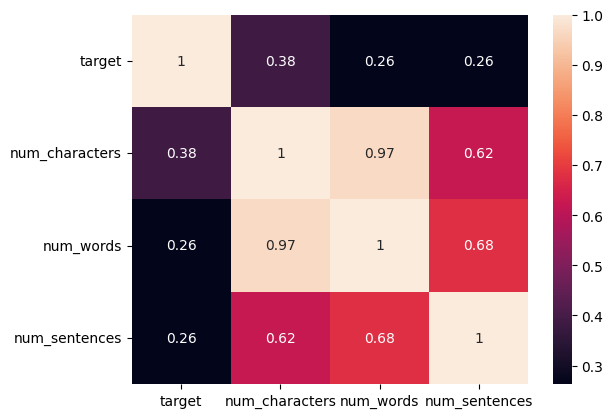

In [75]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# 3. Data Preprocessing

1. Lowercase
2. Tokenization
3. Removing Special Characters
4. Removing Stop words and Punctuations
5. Stemming

In [94]:
# removing 3 part 
from nltk.corpus import stopwords
stopwords.words('english')

# removing 4 part 
import string
string.punctuation

# removing 5 part 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [103]:
# Not Efficient code
# def transform_text(text):
#   text = text.lower()
#   text = nltk.word_tokenize(text)

#   y = []
#   for i in text:
#     if i.isalnum():
#       y.append(i)

#   text = y[:]
#   y.clear()

#   for i in text:
#     if i not in stopwords.words("english") and i not in string.punctuation:
#       y.append(i)
    
#   text = y[:]
#   y.clear()

#   for i in text:
#     y.append(ps.stem(i))

#   return " ".join(y)

In [106]:
# Efficient Code for doing the same Operations
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()
stopwords_set = set(stopwords.words("english"))

def transform_text(text):
    # Lowercase and tokenize in one step using regex (faster)
    tokens = re.findall(r'\b\w+\b', text.lower())

    # Remove stopwords and punctuation, and apply stemming
    filtered = [ps.stem(word) for word in tokens if word not in stopwords_set]

    return " ".join(filtered)


In [107]:
transform_text("hi How are You Ibrahim !!, I wil give 100$, easy free money, high returns, You will be Loving the Profits rate")

'hi ibrahim wil give 100 easi free money high return love profit rate'

In [108]:
# now applying the transformation to our entire text
df['transformed_text'] = df['text'].apply(transform_text)

In [112]:
df.head(1)

,target,text,num_characters,num_words,num_sentences,transform_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...


In [113]:
# mostly used  words
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

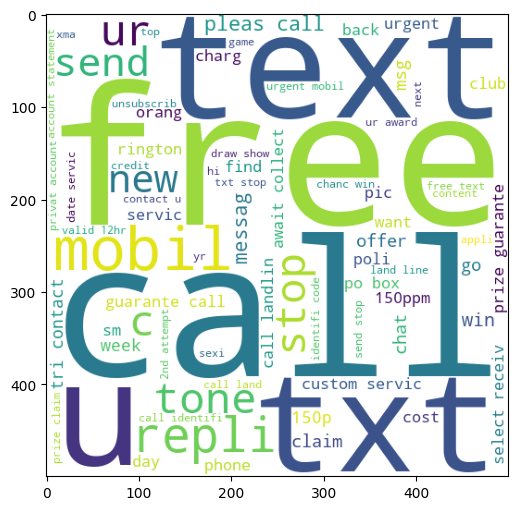

In [ ]:
# mostly used spam words 
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

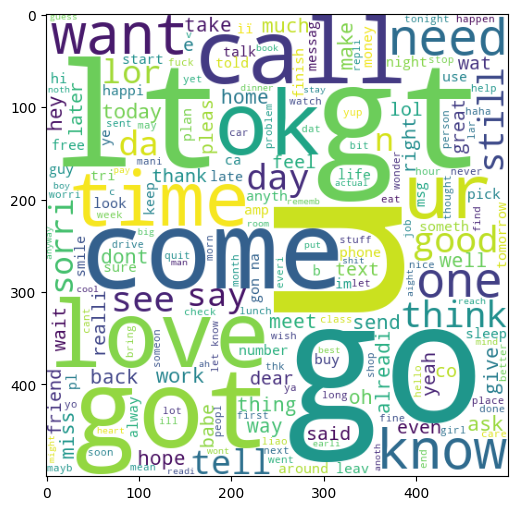

In [117]:
# mostly used ham words (non spam)
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [118]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [ ]:
# spam top 30 words
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
  

In [120]:
len(spam_corpus)

9939

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

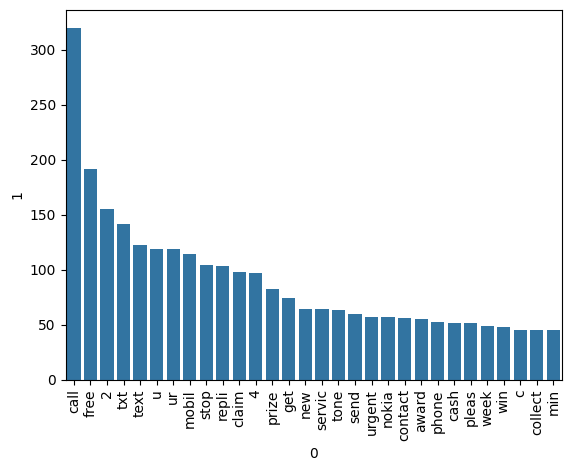

In [131]:
from collections import Counter
sns.barplot(x =pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
           

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

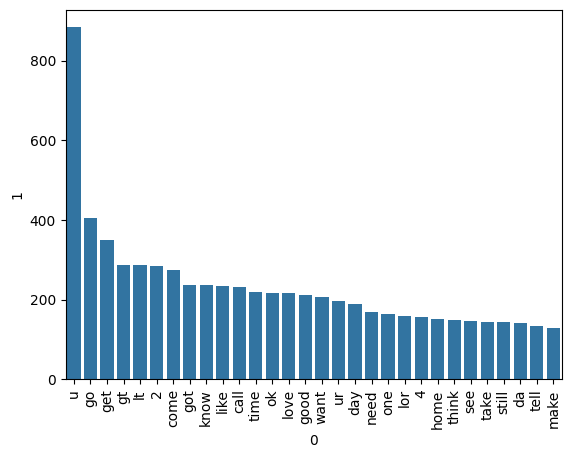

In [133]:
# ham top 30 words
ham_corpus = []
for msg in df[df['target']==0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

len(ham_corpus)

from collections import Counter
sns.barplot(x =pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

# Model Building